In [11]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import img_to_array, load_img, to_categorical

In [33]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from random import randint

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.saving import load_model

In [16]:
image_shape = (28, 28, 1)
n_class = 10
batch_size = 128
epochs = 30
path = '/Users/admin/Downloads/digit-recognizer/'

In [8]:
train_csv = pd.read_csv(path + 'train.csv')
train_n_images = train_csv.shape[0] 

test_csv = pd.read_csv(path + 'test.csv')
test_n_images = test_csv.shape[0]

In [25]:
train_csv.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
train_y = train_csv['label'];
train_y = to_categorical(train_y, n_class)


train_x = train_csv.drop(['label'], axis=1);
train_x = tf.reshape(tf.convert_to_tensor(train_x), (train_n_images, image_shape[0], image_shape[1], image_shape[2]))

test_x = tf.reshape(tf.convert_to_tensor(test_csv), (test_n_images, image_shape[0], image_shape[1], image_shape[2]))

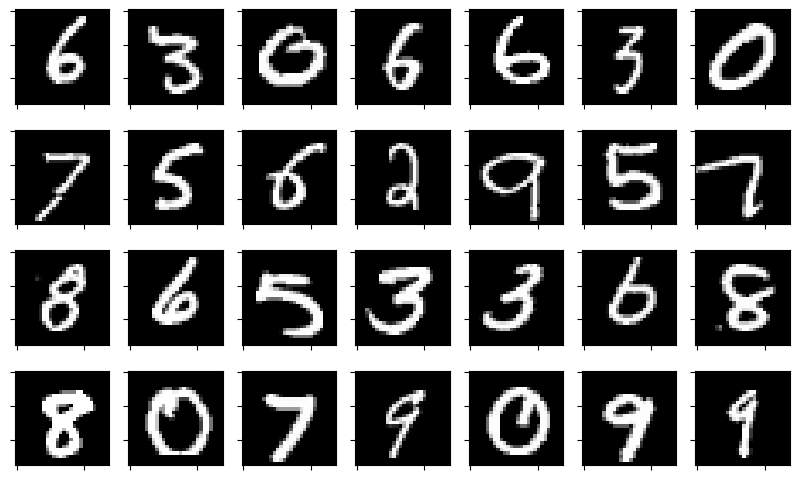

In [34]:
nrows, ncols = 4, 7
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
indexes = [randint(0, train_n_images) for i in range(nrows * ncols)]

n = 0
for i in axes:
    for ax in i:
        ax.imshow(train_x[indexes[n]], cmap='gray')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        n += 1

In [55]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_8 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 activation_9 (Activation)   (None, 11, 11, 128)       0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                 

In [56]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

checkpoint = ModelCheckpoint('model_checkpoint.h5', monitor = 'val_accuracy', 
                             verbose = 1, save_best_only = True, 
                             mode = 'max')
earlystopping = EarlyStopping(monitor = 'val_loss', 
                              verbose = 1, patience = 3, 
                              restore_best_weights = True)
reduce = ReduceLROnPlateau(monitor = "val_loss",
                            patience = 3,
                            factor=0.2,
                            verbose = 1,
                            min_delta=0.0001)
list_callbacks = [checkpoint, earlystopping, reduce]

model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [57]:
model.fit(train_x
          , train_y
          , batch_size=batch_size
          , epochs=epochs
          , validation_split=0.1
          , callbacks=[list_callbacks])

Epoch 1/30
296/296 [==============================] - ETA: 0s - loss: 0.8740 - accuracy: 0.8911
Epoch 1: val_accuracy improved from -inf to 0.97381, saving model to model_checkpoint.h5
296/296 [==============================] - 59s 195ms/step - loss: 0.8740 - accuracy: 0.8911 - val_loss: 0.0797 - val_accuracy: 0.9738 - lr: 0.0010
Epoch 2/30


/Users/admin/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


296/296 [==============================] - ETA: 0s - loss: 0.1214 - accuracy: 0.9632
Epoch 2: val_accuracy improved from 0.97381 to 0.98095, saving model to model_checkpoint.h5
296/296 [==============================] - 73s 247ms/step - loss: 0.1214 - accuracy: 0.9632 - val_loss: 0.0600 - val_accuracy: 0.9810 - lr: 0.0010
Epoch 3/30
296/296 [==============================] - ETA: 0s - loss: 0.0925 - accuracy: 0.9716
Epoch 3: val_accuracy improved from 0.98095 to 0.98214, saving model to model_checkpoint.h5
296/296 [==============================] - 83s 279ms/step - loss: 0.0925 - accuracy: 0.9716 - val_loss: 0.0534 - val_accuracy: 0.9821 - lr: 0.0010
Epoch 4/30
296/296 [==============================] - ETA: 0s - loss: 0.0751 - accuracy: 0.9769
Epoch 4: val_accuracy improved from 0.98214 to 0.98405, saving model to model_checkpoint.h5
296/296 [==============================] - 83s 280ms/step - loss: 0.0751 - accuracy: 0.9769 - val_loss: 0.0480 - val_accuracy: 0.9840 - lr: 0.0010
Epoch 

In [59]:
predict = np.argmax(model.predict(test_x), axis=1)
sample_submission = pd.read_csv('/Users/admin/Downloads/digit-recognizer/sample_submission.csv')
sample_submission['Label'] = predict

875/875 [==============================] - 14s 16ms/step


In [61]:
model.predict(test_x)

875/875 [==============================] - 10s 12ms/step


array([[1.3722400e-11, 3.5268511e-13, 9.9999994e-01, ..., 1.3079304e-11,
        2.5449977e-11, 1.7525585e-12],
       [9.9999982e-01, 1.5393123e-14, 3.4385366e-08, ..., 1.1793451e-10,
        3.2466704e-10, 3.3303291e-08],
       [9.9284518e-11, 1.9272603e-11, 2.1887533e-07, ..., 3.7768866e-10,
        1.4160735e-04, 9.9985504e-01],
       ...,
       [2.5235439e-20, 6.3072328e-16, 1.0629002e-14, ..., 5.9213943e-15,
        5.6059459e-14, 2.8355849e-14],
       [9.0425857e-08, 1.1434806e-10, 1.1233751e-08, ..., 9.0424516e-07,
        6.5766322e-08, 9.9995142e-01],
       [5.1381843e-11, 5.0706253e-12, 9.9999994e-01, ..., 1.1841789e-12,
        9.1674508e-09, 1.6998339e-12]], dtype=float32)

In [ ]:
save_predict = sample_submission.to_csv('cnn_predict.csv', index=False)